# Source detection with Gammapy

## Introduction

This notebook show how to do source detection with Gammapy.
using one of the methods available in [gammapy.detect](http://docs.gammapy.org/en/latest/detect/index.html).

We will do this:
* produce 2-dimensional test-statistics (TS) images using Fermi-LAT 2FHL high-energy Galactic plane survey dataset
* run a peak finder to make a source catalog
* do some simple measurements on each source
* compare to the 2FHL catalog

Note that what we do here is a quick-look analysis.
Producing a real source catalog for Fermi-LAT, [HGPS](https://www.mpi-hd.mpg.de/hfm/HESS/pages/home/som/2016/01/) or CTA is a more elaborate procedure.

We will work with the following functions and classes:

* [photutils](http://photutils.readthedocs.io/en/latest/) for peak finding and measurements
* [gammapy.image.SkyImage](http://docs.gammapy.org/en/latest/api/gammapy.image.SkyImage.html)
* [gammapy.image.SkyImageList](http://docs.gammapy.org/en/latest/api/gammapy.image.SkyImageList.html)
* [gammapy.detect.compute_ts_map](http://docs.gammapy.org/en/latest/api/gammapy.detect.compute_ts_map.html)

## Setup

As always, let's get started with some setup ...

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from astropy.convolution import Gaussian2DKernel
from gammapy.image import SkyImageList
from gammapy.detect import compute_ts_image
from gammapy.catalog import source_catalogs

## Compute TS image

In [3]:
# Load data from files
images = SkyImageList.read('../datasets/fermi_survey/all.fits.gz')

# Compute a source kernel (source template) in oversample mode,
# PSF is not taken into account
kernel = Gaussian2DKernel(2.5, mode='oversample')

# Compute a TS map. 'On' is the raw counts map, 'Background' is the background model,
# 'ExpGammaMap' denotes to the exposure map.
result = compute_ts_image(
    counts=images['COUNTS'],
    background=images['BACKGROUND'],
    exposure=images['EXPOSURE'],
    kernel=kernel,
)
print('TS map computation took {0:.2f} s'.format(result.meta['runtime']))

TS map computation took 6.09 s


## Plot results images

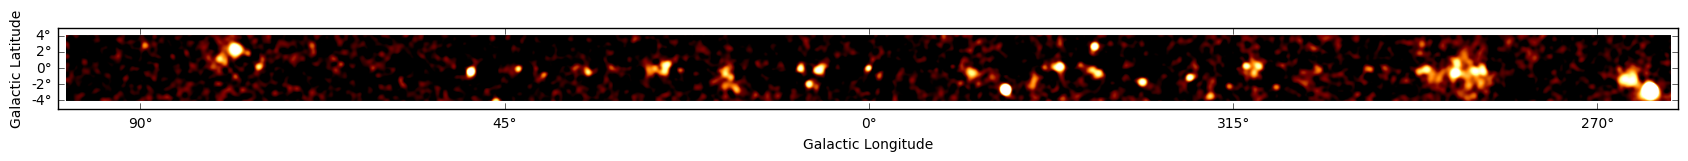

In [4]:
# Plot sqrt(TS) map
fig_ts = plt.figure(figsize=(18, 4))
ax_ts = fig_ts.add_axes([0.1, 0.1, 0.9, 0.9], projection=images['COUNTS'].wcs)
ax_ts.imshow(result['sqrt_ts'], cmap='afmhot', origin='lower', vmin=0, vmax=10)
ax_ts.coords['glon'].set_axislabel('Galactic Longitude')
ax_ts.coords['glat'].set_axislabel('Galactic Latitude')

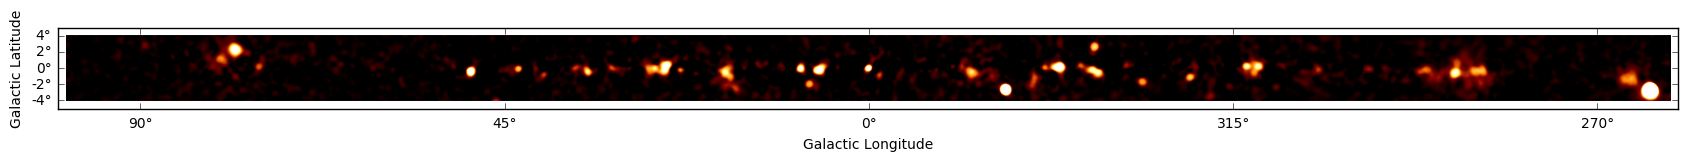

In [5]:
# Plot flux map (in units of m^-2 s^-1 TeV^-1)
fig_flux = plt.figure(figsize=(18, 4))
ax_flux = fig_flux.add_axes([0.1, 0.1, 0.9, 0.9], projection=images['COUNTS'].wcs)
ax_flux.imshow(result['amplitude'], cmap='afmhot', origin='lower', vmin=0, vmax=1E-9)
ax_flux.coords['glon'].set_axislabel('Galactic Longitude')
ax_flux.coords['glat'].set_axislabel('Galactic Latitude')

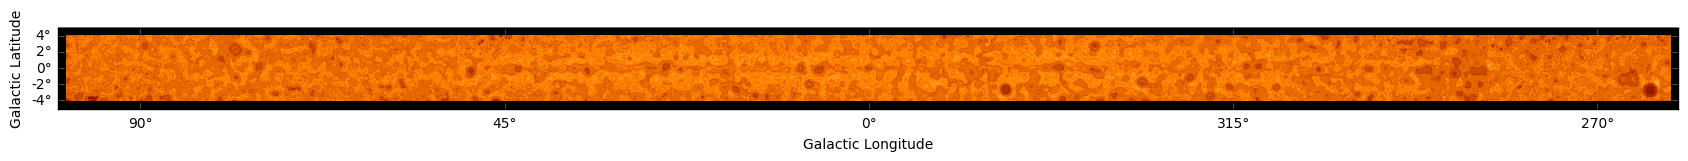

In [6]:
# Plot number of iterations of the fit per pixel
fig_iter = plt.figure(figsize=(18, 4))
ax_iter = fig_iter.add_axes([0.1, 0.1, 0.9, 0.9], projection=images['COUNTS'].wcs)
ax_iter.imshow(result['niter'], cmap='afmhot', origin='lower', vmin=0, vmax=20)
ax_iter.coords['glon'].set_axislabel('Galactic Longitude')
ax_iter.coords['glat'].set_axislabel('Galactic Latitude')

## Source catalog

TODO: run a peak finder to make a source catalog

See [photutils.detection](http://photutils.readthedocs.io/en/latest/photutils/detection.html) docs and specifically the [photutils.detection.find_peaks](http://photutils.readthedocs.io/en/latest/api/photutils.detection.find_peaks.html) function.

In [7]:
from photutils.detection import find_peaks

## Measurements

* TODO: show cutout for a few sources and some aperture photometry measurements (e.g. energy distribution, significance, flux)

In [8]:
# TODO

## Compare to 2FHL

TODO

In [9]:
fermi_2fhl = source_catalogs['2fhl']
fermi_2fhl.table[:5][['Source_Name', 'GLON', 'GLAT']]

Source_Name,GLON,GLAT
str18,float32,float32
2FHL J0008.1+4709,115.339,-15.0688
2FHL J0009.3+5031,116.124,-11.7932
2FHL J0018.5+2947,114.463,-32.5424
2FHL J0022.0+0006,107.172,-61.8618
2FHL J0033.6-1921,94.28,-81.2224


## Exercises

TODO: put one or more exercises

In [10]:
# Start exercises here!

## What next?

In this notebook, we have seen how to work with images and compute TS images from counts data, if a background estimate is already available.

Here's some suggestions what to do next:

- TODO: point to background estimation examples
- TODO: point to other docs ...